# Exoplanet Hunt

*This notebook presents the first step of the project: ETL. Here the data will be loaded, transformed and saved in its processed form. We will look at few particular instances of the data and examine its qualite. Finally, two feature engineering approaches will be studied.*

It is designed to be launched both in Watson Studio and locally. The main difference lays in the way of accessing and saving files.
When working in Watson Studio the data is saved in the form of csv files, while locally one uses `np.save` to save data as .npy files.

## Settings

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pywt
import time
import scipy
from scipy import signal

In [2]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='***********************', project_access_token='***********************')
pc = project.project_context


## Load data - Watson

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_218571fbccfd4499a4ddae72777d88d1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='***********************',
    ibm_auth_endpoint='***********************',
    config=Config(signature_version='oauth'),
    endpoint_url='***********************')

body = client_218571fbccfd4499a4ddae72777d88d1.get_object(Bucket='***********************',Key='exoTrain.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [4]:

body = client_218571fbccfd4499a4ddae72777d88d1.get_object(Bucket='***********************',Key='exoTest.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_test = pd.read_csv(body)
df_test.head()


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


## Load Data - Colab

In [3]:
# from google.colab import drive
# drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [4]:
# %cd "/gdrive/My Drive/IBM DS Capstone"

/gdrive/My Drive/IBM DS Capstone


## Load Data - Local

In [5]:
%ls

In [6]:
# %mkdir "data"

mkdir: cannot create directory ‘data’: File exists


In [0]:
# df = pd.read_csv('exoTrain.csv')
# df_test = pd.read_csv('exoTest.csv')

## Data cleansing and Verification

In [5]:
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [6]:
print("There are {:d} instances in the train subset.".format(len(df)))
print("There are {:d} instances in the test subset.".format(len(df_test)))

There are 5087 instances in the train subset.
There are 570 instances in the test subset.


In [7]:
print("Each instance is represented by a row of {:d} \
measurements and a binary label.".format(df.shape[1]-1))

Each instance is represented by a row of 3197 measurements and a binary label.


### Separating data into features and labels
- *1 - star has an exoplanet in its orbit*
- *0 - it does not*

In [8]:
y_train = pd.DataFrame(df.LABEL-1)
y_train.head()

,LABEL
0,1
1,1
2,1
3,1
4,1


In [9]:
df.drop(['LABEL'], axis=1, inplace=True)
df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [10]:
y_test = pd.DataFrame(df_test.LABEL-1)
df_test.drop(['LABEL'], axis=1, inplace=True)

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([5050,   37]))

***Comment:*** One may observe that there are way less data on stars with exoplanets than on planetless stars.

### Missing values

In [12]:
na_counts = np.array(df.isna().sum())
print("Train: ", np.unique(na_counts))
na_counts_test = np.array(df_test.isna().sum())
print("Test: ", np.unique(na_counts_test))

Train:  [0]
Test:  [0]


***Comment:*** It seems there are no missing values, which is expected enough, as the dataset was taken from a credible source, where it was pretreated beforehand.

## Inspecting one instance closer

To have a more complete understanding of the data it is worth to throw an eye on one particular instance. 
$$
$$
So, one should extract one datasample of a system with exoplanets and one sample of exoplanetless system. Those a stored in variables `exo` and `no_exo` respectively.

In [13]:
exo = np.array(df[y_train.LABEL == 1].iloc[1])
no_exo = np.array(df[y_train.LABEL == 0].iloc[1])
print(len(exo))

3197


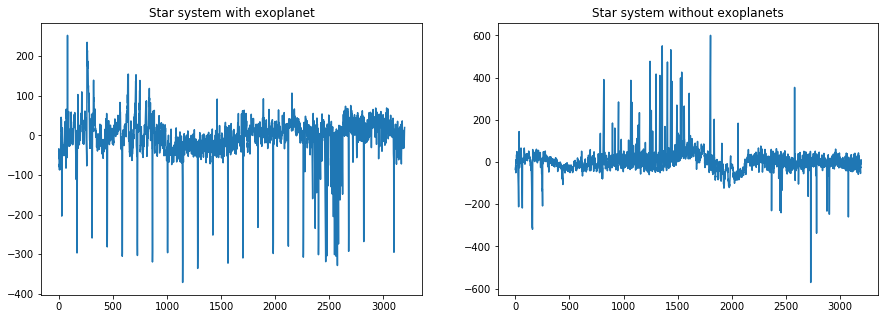

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].set_title("Star system with exoplanet")
ax[0].plot(exo)
ax[1].set_title("Star system without exoplanets")
ax[1].plot(no_exo);


***Comment:*** It is worth noticing, that different instances have different variances, and probably different means. Thus, one should not apply normalization over the whole dataset, but over one row at a time.
$$
$$
Considering the nature of the data, it is perfectly explainable: each row depicts light intensity of one star, which obviously will vary from one star to another as a function of distance to it, its true brightness and density of the objects on the way of light to the observer.
$$
$$
All in all, lets have a look at few samples at a time.

In [15]:
nb_samples = 4

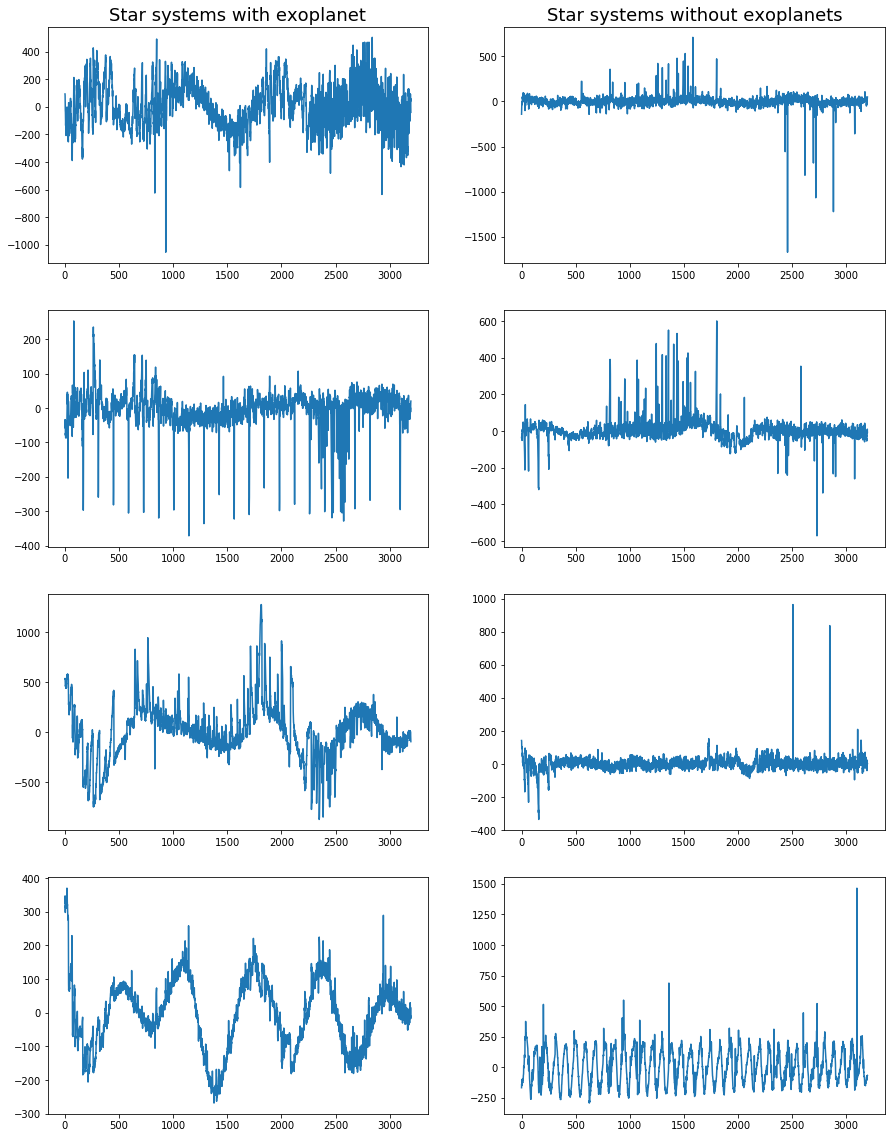

In [16]:
fig, ax = plt.subplots(nb_samples, 2, figsize = (15, 20))
ax[0][0].set_title("Star systems with exoplanet", fontsize=18)
ax[0][1].set_title("Star systems without exoplanets", fontsize=18)

for i in range(nb_samples):
    
    exo = np.array(df[y_train.LABEL == 1].iloc[i])
    no_exo = np.array(df[y_train.LABEL == 0].iloc[i])
    
    ax[i][0].plot(exo)
    ax[i][1].plot(no_exo);



## Statistics

*One will calculate various statistics for each star with a hope to gain additional insight on the nature of data.*

In [17]:
df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [18]:
stats = pd.DataFrame(df.mean(axis=1))
stats.rename(columns={0:'Mean'}, inplace=True)
stats['Median'] = df.median(axis=1)
stats['STD'] = df.std(axis=1)
stats["LABEL"] = y_train
print(stats[stats.LABEL == 0].iloc[:10])
print(stats[stats.LABEL == 1].iloc[:10])

          Mean  Median          STD  LABEL
37    0.209246     0.0    84.259991      0
38    4.212268     0.0    63.013855      0
39    0.891442     0.0    41.128459      0
40    4.850673     0.0   140.215612      0
41   33.159481     0.0  1675.513760      0
42   -5.518486     0.0   187.767970      0
43    0.063203     0.0     8.552114      0
44   -0.207226     0.0    56.759655      0
45    5.224082     0.0    47.988229      0
46  440.972699     0.0  3487.104306      0
         Mean  Median          STD  LABEL
0    9.953857   -0.01   160.728487      1
1   -7.427932    0.01    60.011024      1
2    8.189087   -0.08   281.876484      1
3   -4.646587   -0.01   103.238723      1
4  -14.240660    0.02   407.121292      1
5   18.015580   -0.02   155.684307      1
6    1.267789    0.00    28.395814      1
7  -88.620873   -0.05   526.600673      1
8    0.059118    0.02    37.116934      1
9  209.115934    1.09  1501.426313      1


***Comment:*** One confirms, that order of values varies significantly from one star to another. It may be seen more clearly in terms of mean and median, however, standard deviation seem to vary greatly from star to star for both classes.

One may as well observe the differences between planetless systems and those, which contain exoplanets, and so may hope and aspire to capture them using a fitting technique.

Having in mind that the data is initially time series, it might be interesing to look at its Fourier or Wavelet Transforms to also examine and consider the frequency domain. One will stick with Wavelet Transform, as it allows to consider both time and frequency domains at the same time.

## Wavelet transform and Scalograms

In [0]:
def plot_scalogram(time, signal, scales, 
                 waveletname = 'gaus1', 
                 cmap = 'plasma', 
                 title = 'Scalogram of a signal', 
                 ylabel = 'Scale', 
                 xlabel = 'Time'):
    
    dt = time[1] - time[0]
    coefficients, frequencies = pywt.cwt(signal, scales, waveletname, dt)

    fig = plt.figure(figsize=(15, 5))
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    im = plt.imshow(coefficients, cmap)
    fig.colorbar(im, orientation="horizontal")

In [0]:
# it is crucial to choose a good scales parameter to maximize the gain of information
scales = np.zeros(128)
scales[:9] = np.arange(0.1, 1, 0.1)
scales[9:] = np.arange(1., 120, 1)
scales[:20]

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  2. ,
        3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. ])

Took 0.11 seconds


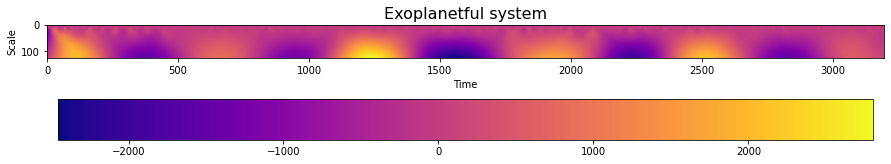

In [0]:
start_time = time.time()
times = np.arange(len(exo))
plot_scalogram(times, exo, scales, title="Exoplanetful system")
print("Took {:.2f} seconds".format(time.time() - start_time))

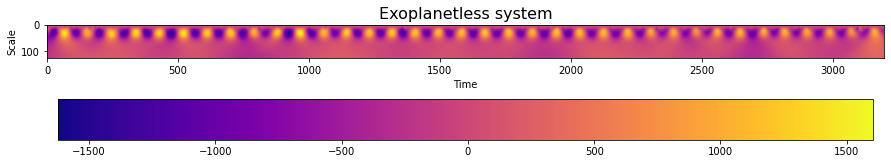

In [0]:
times = np.arange(len(no_exo))
plot_scalogram(times, no_exo, scales, title="Exoplanetless system")

***Comment:*** One may observe even more visible differences by analyzing scalograms!

It might be useful to consider training one of the models on scalograms, instead of initial form of the data.

## Feature Extraction and Creation

In this part, we prepare our data to be fed to the models. As one will probably work with Neural Networks, we will normalize it, as discussed above. Besides that, we will try to produce some interesting features. 

However, as we will now work with the whole dataset, these tasks may become fairly time consuming, so we will load our datasets as spark dataframes to profit from some nice parallelization.

### Saving labels
*Labels are binary, so they do not need any pretreatment, so we can write them into .csv files already*

In [21]:
project.save_data("labels_train.csv", y_train.to_csv(index=False), overwrite=True)
project.save_data("labels_test.csv", y_test.to_csv(index=False), overwrite=True)
# np.save("data/label_train.npy", y_train.to_numpy())
# np.save("data/label_test.npy", y_test.to_numpy())

{'file_name': 'labels_test.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'capstoneproject-donotdelete-pr-ld3odwtjkc2q9w',
 'asset_id': 'bf2a85e3-be53-47a5-a5eb-e1cd23004d1c'}

In [22]:
x_train = df.to_numpy()
x_train.shape

(5087, 3197)

In [23]:
x_test = df_test.to_numpy()
x_test.shape

(570, 3197)

### Only normalization

*One approach to data normalization is also called Standard Score:
$$
    X_{norm} = \frac{X - \mu}{\sigma}
$$
We will stick with it for the moment and see if there's a need to examine other options.

One might also like to round floats to a given number of decimals to avoid overloading the computations.

In [24]:
def normalize_rows(data_in, floating_points=8, verbose=False):
    data = data_in.copy()
    nb = data.shape[1]
    means = np.sum(data, axis = 1)/nb
    
    std_dev = np.sum((data - means[:,np.newaxis])**2, axis=1)/(nb - 1)
    
    if verbose:
        print("Check means: ", means)
        print("Check std: ", std_dev)

    data -= means[:,np.newaxis]
    data /= std_dev[:, np.newaxis]
    
    np.around(data, decimals=floating_points)
    
    return data


#### - Train

In [25]:
x_train_norm = normalize_rows(x_train, verbose=True)

Check means:  [ 9.95385674 -7.42793244  8.18908664 ...  2.93976228  0.80310916
  5.19516734]
Check std:  [25833.64663947  3601.32300808 79454.35250186 ...  3766.67751834
   120.39902368  3797.56194319]


In [26]:
x_train_norm[0]

array([ 0.00324755,  0.00285891,  0.00039275, ...,  0.00199221,
       -0.00018866, -0.00191587])

In [27]:
print("Double check: ", np.mean(x_train_norm, axis = 1))

Double check:  [ 1.21544591e-19  2.08362157e-19 -1.73635131e-20 ... -2.08362157e-19
 -1.66689725e-18  6.94540522e-20]


In [28]:
df_norm = pd.DataFrame(x_train_norm)
project.save_data("clean_train.csv", df_norm.to_csv(index=False), overwrite=True)
# np.save("data/clean_train.npy", x_train_norm)

{'file_name': 'clean_train.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'capstoneproject-donotdelete-pr-ld3odwtjkc2q9w',
 'asset_id': 'cc450863-ddbf-491e-a201-52aec39bc99e'}

#### - Test

In [29]:
x_test_norm = normalize_rows(x_test, verbose=False)

In [30]:
print("Double check: ", np.mean(x_test_norm, axis = 1)[:10])

Double check:  [ 0.00000000e+00  8.68175653e-21  2.77816209e-19  0.00000000e+00
  1.38908104e-19  1.11126484e-18  6.94540522e-19  0.00000000e+00
  2.77816209e-19 -4.16724313e-19]


In [31]:
df_test_norm = pd.DataFrame(x_test_norm)
project.save_data("clean_test.csv", df_test_norm.to_csv(index=False), overwrite=True)
# np.save("data/clean_test.npy", x_test_norm)

{'file_name': 'clean_test.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'capstoneproject-donotdelete-pr-ld3odwtjkc2q9w',
 'asset_id': '8185d499-721a-4031-900f-505ec6e981b0'}

### Detrended data

This approach is entirely different: instead of working with almost raw data, one will try to make it as standardized as possible:

- The trendline will be removed;
- New data will be normalized;
- Outliers cleaned;

In [19]:
def gaussian_smooth(data, l=-3, r=3, m=42):
    
    # creating a mask
    t = np.linspace(l,r,m)
    gauss = np.exp(-0.8*(t+1)**2)
    gauss /= np.sum(gauss)
    #print("Smoothing with a mask of length ", len(gauss))
    
    return np.convolve(data, gauss, mode='same')

In [20]:
def detrend(data):

    smooth = gaussian_smooth(data, l=-5, r=5, m = 100)
    detrended = data-smooth
    detrended -= np.mean(detrended)
    detrended /= (np.max(detrended) - np.min(detrended))

    return detrended

In [21]:
from scipy.ndimage.filters import gaussian_filter

exo = np.array(df[y_train.LABEL == 1].iloc[1])
no_exo = np.array(df[y_train.LABEL == 0].iloc[1])

g1 = gaussian_filter(exo, sigma=10)
g2 = gaussian_smooth(exo, l=-5, r=5, m = 100)

ng1 = gaussian_filter(no_exo, sigma=10)
ng2 = gaussian_smooth(no_exo, l=-5, r=5, m = 100)

exo_d = detrend(exo)
no_exo_d = detrend(no_exo)

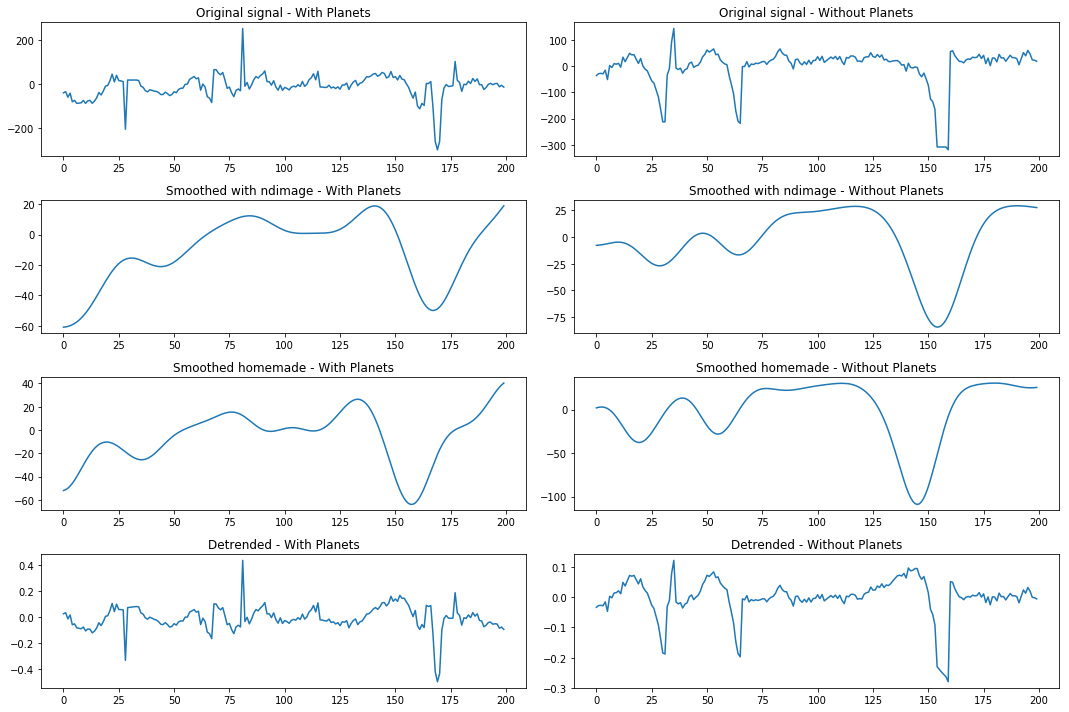

In [22]:
plot_from = 0
plot_to = 200

fig, axs = plt.subplots(4, 2, figsize=(15, 10))

axs[0, 0].plot(exo[plot_from:plot_to]);
axs[0, 0].set_title("Original signal - With Planets")
axs[1, 0].plot(g1[plot_from:plot_to]);
axs[1, 0].set_title("Smoothed with ndimage - With Planets")
axs[2, 0].plot(g2[plot_from:plot_to]);
axs[2, 0].set_title("Smoothed homemade - With Planets")
axs[3, 0].plot(exo_d[plot_from:plot_to]);
axs[3, 0].set_title("Detrended - With Planets")

axs[0, 1].plot(no_exo[plot_from:plot_to]);
axs[0, 1].set_title("Original signal - Without Planets")
axs[1, 1].plot(ng1[plot_from:plot_to]);
axs[1, 1].set_title("Smoothed with ndimage - Without Planets");
axs[2, 1].plot(ng2[plot_from:plot_to]);
axs[2, 1].set_title("Smoothed homemade - Without Planets");
axs[3, 1].plot(no_exo_d[plot_from:plot_to]);
axs[3, 1].set_title("Detrended - Without Planets");

plt.tight_layout();

***Comment:*** As we are looking for the moments where star is eclipsed by one of its planets, the interest lays in drops of light intensity. We are not going to glean anything from spike-outliers, so we will remove them.

In [23]:
def remove_high_outliers(data, n_sigmas=2):

    clip_value = np.mean(data)+n_sigmas*np.std(data, ddof=1)
    clipped = np.clip(data, a_min=None, a_max=clip_value)
    return clipped

In [24]:
clipped_exo = remove_high_outliers(exo_d)
clipped_no_exo = remove_high_outliers(no_exo_d)

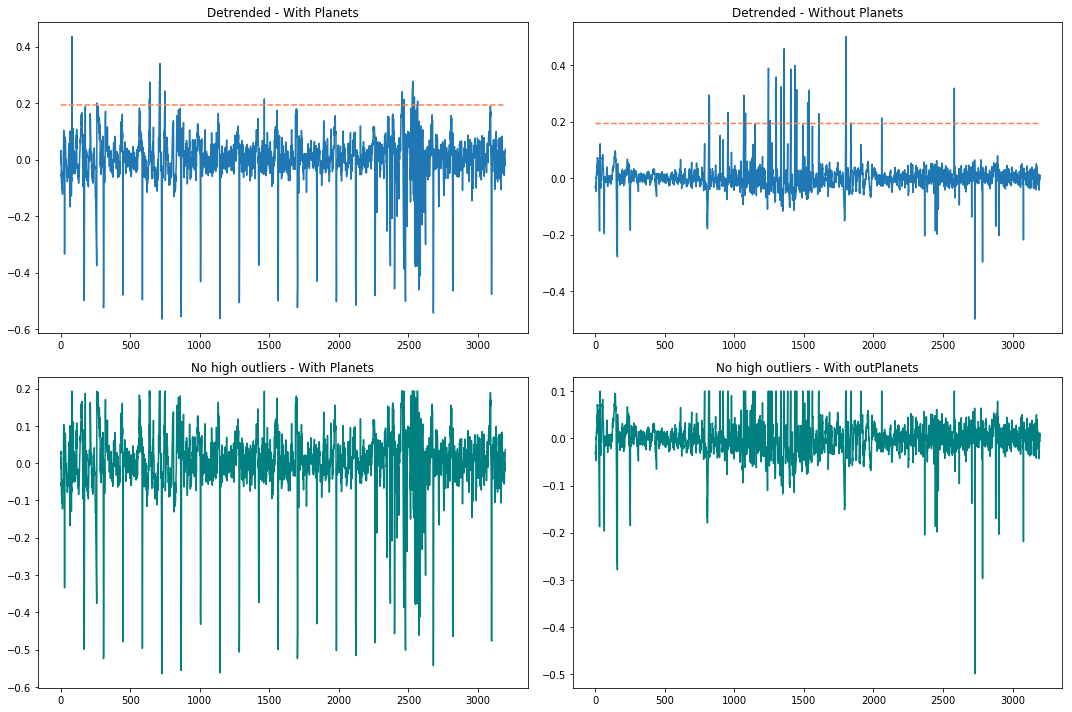

In [25]:
plot_from = 0
plot_to = len(exo_d)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].plot(exo_d[plot_from:plot_to]);
axs[0, 0].plot(np.arange(plot_from, plot_to), 
               np.ones_like(exo_d[plot_from:plot_to])*(np.mean(exo_d)+2*np.std(exo_d, ddof=1)), 
               '--', color='coral');
axs[0, 0].set_title("Detrended - With Planets")

axs[1, 0].plot(clipped_exo[plot_from:plot_to], color='teal');
axs[1, 0].set_title("No high outliers - With Planets")

axs[0, 1].plot(no_exo_d[plot_from:plot_to]);
axs[0, 1].plot(np.arange(plot_from, plot_to), 
               np.ones_like(exo_d[plot_from:plot_to])*(np.mean(no_exo_d)+2*np.std(exo_d, ddof=1)), 
               '--', color='coral');
axs[0, 1].set_title("Detrended - Without Planets");

axs[1, 1].plot(clipped_no_exo[plot_from:plot_to], color='teal');
axs[1, 1].set_title("No high outliers - With outPlanets")

plt.tight_layout();

#### - Train

In [26]:
def produce_detrended(data):

    out = []
    
    for row in data:
        d = detrend(row)
        no_high = remove_high_outliers(d)

        out.append(no_high)
        
    return np.array(out)

In [27]:
start_time = time.time()
x_train_detrend = produce_detrended(df.to_numpy())
df_trend = pd.DataFrame(x_train_detrend)
project.save_data("x_train_detrend.csv", df_trend.to_csv(index=False), overwrite=True)
# np.save("data/x_train_detrend.npy", x_train_detrend)
total_time = time.time() - start_time
print("Took {:.2f} seconds".format(total_time))

Took 52.92 seconds


#### - Test

In [28]:
start_time = time.time()
x_test_detrend = produce_detrended(df_test.to_numpy())
df_trend_test = pd.DataFrame(x_test_detrend)
project.save_data("x_test_detrend.csv", df_trend_test.to_csv(index=False), overwrite=True)
# np.save("data/x_test_detrend.npy", x_test_detrend)
total_time = time.time() - start_time
print("Took {:.2f} seconds".format(total_time))

Took 6.41 seconds


### Wavelet Transform
***Not feasible in Watson Studio***

***Have not found a way to save a 3d tensor, as np.save does not work it seems***

- WT will be applied to every row of the data array
- it is crucial to choose a good scales parameter to maximize the gain of information
- it is recommendedd to normalize the data before applying WT

In [0]:
def wavelet_transform(data, scales, 
                      waveletname = 'gaus1', 
                      dt=1.0, floating_points=8):
    
    # creating a tensor of a fitting shape
    transformed = np.zeros(shape=(data.shape[0], scales.shape[0], data.shape[1]))
                           
    for i, row in enumerate(data):
        coefficients, frequencies = pywt.cwt(row, scales, waveletname, dt)
        transformed[i, :, :] = np.around(coefficients, decimals=floating_points).copy()
        
    return transformed
            

#### - Train

In [42]:
# df = pd.read_csv('exoTrain.csv')
# batch = 750
# df.LABEL -= 1

# exo = df[y_train.LABEL == 1].iloc[:batch]
# no_exo = df[y_train.LABEL == 0].iloc[:batch]

In [0]:
# df_wave = pd.concat([exo, no_exo])
# x_wave = df_wave.to_numpy()
# np.unique(x_wave[:, 0], return_counts=True)

(array([0., 1.]), array([750,  37]))

In [0]:
# x_wave_norm = normalize_rows(x_wave, verbose=False)

In [0]:
# start_time = time.time()
# scales = np.zeros(128)
# scales[:9] = np.arange(0.1, 1, 0.1)
# scales[9:] = np.arange(1., 120, 1)
# scales[:20]
# x_wave = wavelet_transform(x_wave_norm, scales)
# total_time = time.time() - start_time
# print("Took {:.2f} seconds".format(total_time))
# x_wave.shape

Took 49.45 seconds


(787, 128, 3198)

In [0]:
# np.save("data/wave_train.npy", x_wave)

#### - Test

In [0]:
# start_time = time.time()
# scales = np.zeros(128)
# scales[:9] = np.arange(0.1, 1, 0.1)
# scales[9:] = np.arange(1., 120, 1)
# scales[:20]
# x_wave_test = wavelet_transform(x_test_norm, scales)
# total_time = time.time() - start_time
# print("Took {:.2f} seconds".format(total_time))
# x_wave_test.shape

Took 35.74 seconds


(570, 128, 3198)

In [0]:
# np.save("data/wave_test.npy", x_wave_test)

### Detrending + FFT

*Finally, as working in timescale is computationally heavy, one may try to only pass to frequency domain and apply filtering as an alternative feature creation*

One should note that there are numerous possibilities to achieve what's described above. In the current experiment it was decided to:

* clean data as in section `Detrended data` to eliminate some undesirable frequencies
* pass to frequency domain using FFT

In [29]:
def produce_freqs(data, scaling='minmax'):
    
    out = []
    
    for row in data:
        hs = np.fft.fft(row)
        hs = hs.real

        if scaling == 'std':
            hs -= np.mean(hs)
            hs /= np.std(hs, ddof=1)
        if scaling == 'minmax':
            hs = (hs - np.min(hs))/(np.max(hs) - np.min(hs))
        if scaling == 'meanmax':
            hs = (hs - np.mean(hs))/(np.max(hs) - np.min(hs))
        
        out.append(hs[:len(hs)//2])
        
    return np.array(out)
        

In [30]:
y_train.LABEL.ne(1)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
5057     True
5058     True
5059     True
5060     True
5061     True
5062     True
5063     True
5064     True
5065     True
5066     True
5067     True
5068     True
5069     True
5070     True
5071     True
5072     True
5073     True
5074     True
5075     True
5076     True
5077     True
5078     True
5079     True
5080     True
5081     True
5082     True
5083     True
5084     True
5085     True
5086     True
Name: LABEL, Length: 5087, dtype: bool

In [31]:
no_exo = x_train_detrend[8]
exo = x_train_detrend[5084]

exo_f = np.fft.fft(exo)
no_exo_f = np.fft.fft(no_exo)

exo_f -= np.mean(exo_f)
exo_f /= (np.max(exo_f) - np.min(exo_f))

no_exo_f -= np.mean(no_exo_f)
no_exo_f /= (np.max(no_exo_f) - np.min(no_exo_f))

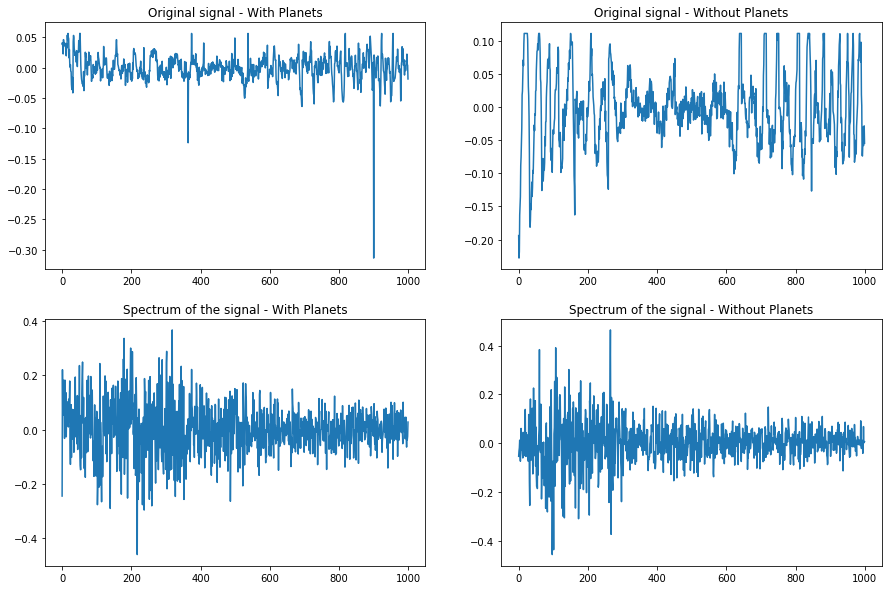

In [32]:
plot_from = 0
plot_to = 1000

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].plot(exo[plot_from:plot_to]);
axs[0, 0].set_title("Original signal - With Planets")
axs[1, 0].plot(exo_f.real[plot_from:plot_to]);
axs[1, 0].set_title("Spectrum of the signal - With Planets")

axs[0, 1].plot(no_exo[plot_from:plot_to]);
axs[0, 1].set_title("Original signal - Without Planets")
axs[1, 1].plot(no_exo_f.real[plot_from:plot_to]);
axs[1, 1].set_title("Spectrum of the signal - Without Planets");

#### - Train

In [33]:
start_time = time.time()
x_train_freq = produce_freqs(x_train_detrend, scaling='meanmax')
df_freq = pd.DataFrame(x_train_freq)
project.save_data("x_train_freq.csv", df_freq.to_csv(index=False), overwrite=True)
# np.save("data/x_train_freq.npy", x_train_freq)
total_time = time.time() - start_time
print("Took {:.2f} seconds".format(total_time))

Took 25.65 seconds


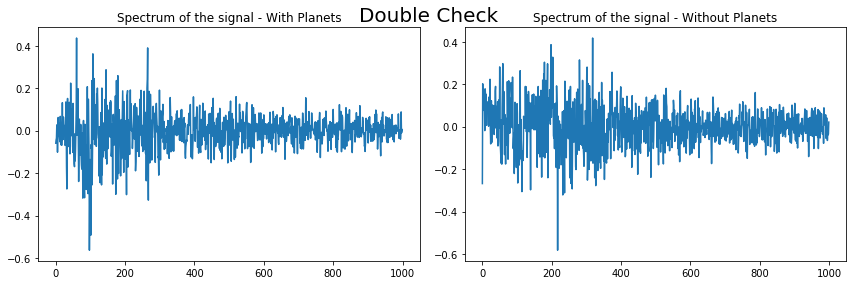

In [41]:
plot_from = 0
plot_to = 1000
exo = x_train_freq[8]
no_exo = x_train_freq[5084]

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Double Check', fontsize=20)

axs[0].plot(exo[plot_from:plot_to]);
axs[0].set_title("Spectrum of the signal - With Planets");

axs[1].plot(no_exo[plot_from:plot_to]);
axs[1].set_title("Spectrum of the signal - Without Planets");
plt.tight_layout();

#### - Test

In [34]:
start_time = time.time()
x_test_freq = produce_freqs(x_test_detrend, scaling='meanmax')
df_test_freq = pd.DataFrame(x_test_freq)
project.save_data("x_test_freq.csv", df_test_freq.to_csv(index=False), overwrite=True)
# np.save("data/x_test_freq.npy", x_test_freq)
total_time = time.time() - start_time
print("Took {:.2f} seconds".format(total_time))

Took 3.28 seconds


` Now it is time to test various models, training them on different variations of our data. `

` Lets get down to business ! `